## Data Analytics Sample Project
### Predict whether the cancer is benign or malignant



## Breast Cancer Wisconsin (Diagnostic) Data Set

In the project we'll be using the _Breast Cancer Wisconsin (Diagnostic) Data Set_ to predict whether the cancer is benign or malignant. 

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This data set is from the UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

This data set is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.


In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from statsmodels.formula.api import ols
from sklearn import svm # SVM classifier
from sklearn.neural_network import MLPClassifier # MLP classifier
from sklearn import cross_validation # used to test classifier
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve # ROC Curves
from sklearn.metrics import auc # Calculating AUC for ROC's!
import warnings
warnings.filterwarnings('ignore')

/Users/bear/anaconda/envs/py27/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
field_names_df = pd.read_table('https://raw.githubusercontent.com/ga-students/DAT-BOS-16/master/data/wpbc_data_field_names.txt',header=None)
field_names=field_names_df[0].tolist()
field_names

['ID',
 'diagnosis',
 'radius_mean',
 'radius_sd_error',
 'radius_worst',
 'texture_mean',
 'texture_sd_error',
 'texture_worst',
 'perimeter_mean',
 'perimeter_sd_error',
 'perimeter_worst',
 'area_mean',
 'area_sd_error',
 'area_worst',
 'smoothness_mean',
 'smoothness_sd_error',
 'smoothness_worst',
 'compactness_mean',
 'compactness_sd_error',
 'compactness_worst',
 'concavity_mean',
 'concavity_sd_error',
 'concavity_worst',
 'concave_points_mean',
 'concave_points_sd_error',
 'concave_points_worst',
 'symmetry_mean',
 'symmetry_sd_error',
 'symmetry_worst',
 'fractal_dimension_mean',
 'fractal_dimension_sd_error',
 'fractal_dimension_worst']

In [3]:
breast_cancer = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data',header=None,names = field_names)
breast_cancer.head()

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
#data formating ID is a non-informative column
breast_cancer = breast_cancer.drop("ID", 1)
breast_cancer.head()

,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# Find the classes of the nominal variable diagnosis
cats=breast_cancer.diagnosis.unique()
cats

array(['M', 'B'], dtype=object)

In [6]:
breast_cancer.groupby('diagnosis').count()

,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,357,357,357,357,357,357,357,357,357,357,...,357,357,357,357,357,357,357,357,357,357
M,212,212,212,212,212,212,212,212,212,212,...,212,212,212,212,212,212,212,212,212,212


This should be OK. Class Imbalance is present when a class populates only 10-20% of the data set. This looks roughly a 60/40 split.

In [7]:
print breast_cancer.shape
print breast_cancer.dtypes
breast_cancer.describe()

(569, 31)
diagnosis                      object
radius_mean                   float64
radius_sd_error               float64
radius_worst                  float64
texture_mean                  float64
texture_sd_error              float64
texture_worst                 float64
perimeter_mean                float64
perimeter_sd_error            float64
perimeter_worst               float64
area_mean                     float64
area_sd_error                 float64
area_worst                    float64
smoothness_mean               float64
smoothness_sd_error           float64
smoothness_worst              float64
compactness_mean              float64
compactness_sd_error          float64
compactness_worst             float64
concavity_mean                float64
concavity_sd_error            float64
concavity_worst               float64
concave_points_mean           float64
concave_points_sd_error       float64
concave_points_worst          float64
symmetry_mean                 float64
sy

,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
breast_cancer.groupby('diagnosis').mean()

,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [9]:
breast_cancer.groupby('diagnosis').median()

,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,12.200,17.39,78.18,458.4,0.09076,0.07529,0.03709,0.02344,0.1714,0.061540,...,13.35,22.820,86.92,547.4,0.12540,0.16980,0.1412,0.07431,0.2687,0.07712
M,17.325,21.46,114.20,932.0,0.10220,0.13235,0.15135,0.08628,0.1899,0.061575,...,20.59,28.945,138.00,1303.0,0.14345,0.35635,0.4049,0.18200,0.3103,0.08760


In [10]:
predictor_names=field_names_df[0].tolist()
predictor_names=predictor_names[2:]
predictor_names

['radius_mean',
 'radius_sd_error',
 'radius_worst',
 'texture_mean',
 'texture_sd_error',
 'texture_worst',
 'perimeter_mean',
 'perimeter_sd_error',
 'perimeter_worst',
 'area_mean',
 'area_sd_error',
 'area_worst',
 'smoothness_mean',
 'smoothness_sd_error',
 'smoothness_worst',
 'compactness_mean',
 'compactness_sd_error',
 'compactness_worst',
 'concavity_mean',
 'concavity_sd_error',
 'concavity_worst',
 'concave_points_mean',
 'concave_points_sd_error',
 'concave_points_worst',
 'symmetry_mean',
 'symmetry_sd_error',
 'symmetry_worst',
 'fractal_dimension_mean',
 'fractal_dimension_sd_error',
 'fractal_dimension_worst']

In [11]:
def rank_predictors(dat,l,f='diagnosis'):
    rank={}
    max_vals=dat.max()
    median_vals=dat.groupby(f).median()  # We are using the median as the mean is sensitive to outliers
    for p in l:
        score=np.abs((median_vals[p]['B']-median_vals[p]['M'])/max_vals[p])
        rank[p]=score
    return rank
cat_rank=rank_predictors(breast_cancer,predictor_names) 
cat_rank

{'area_mean': 0.00035919540229885377,
 'area_sd_error': 0.10083536373129133,
 'area_worst': 0.0011258955987717171,
 'compactness_mean': 0.090694239290989687,
 'compactness_sd_error': 0.047285353535353548,
 'compactness_worst': 0.097442697480583443,
 'concave_points_mean': 0.12363746467501009,
 'concave_points_sd_error': 0.203343949044586,
 'concave_points_worst': 0.17762106252938412,
 'concavity_mean': 0.017606079797340073,
 'concavity_sd_error': 0.031216487935656838,
 'concavity_worst': 0.20088790233074363,
 'fractal_dimension_mean': 0.37006872852233669,
 'fractal_dimension_sd_error': 0.062669478758662286,
 'fractal_dimension_worst': 0.050506024096385493,
 'perimeter_mean': 0.26771321462043107,
 'perimeter_sd_error': 0.31232604373757455,
 'perimeter_worst': 0.060855263157894794,
 'radius_mean': 0.18231945926716484,
 'radius_sd_error': 0.10361507128309573,
 'radius_worst': 0.19108753315649865,
 'smoothness_mean': 0.083189262966333027,
 'smoothness_sd_error': 0.071606418295831795,
 'smo

In [12]:
cat_rank=sorted(cat_rank.items(), key=lambda x: x[1])
cat_rank

[('area_mean', 0.00035919540229885377),
 ('area_worst', 0.0011258955987717171),
 ('smoothness_worst', 0.010295534853838727),
 ('concavity_mean', 0.017606079797340073),
 ('concavity_sd_error', 0.031216487935656838),
 ('compactness_sd_error', 0.047285353535353548),
 ('fractal_dimension_worst', 0.050506024096385493),
 ('perimeter_worst', 0.060855263157894794),
 ('fractal_dimension_sd_error', 0.062669478758662286),
 ('texture_sd_error', 0.070012239902080733),
 ('smoothness_sd_error', 0.071606418295831795),
 ('symmetry_mean', 0.081087151841868751),
 ('smoothness_mean', 0.083189262966333027),
 ('compactness_mean', 0.090694239290989687),
 ('compactness_worst', 0.097442697480583443),
 ('area_sd_error', 0.10083536373129133),
 ('radius_sd_error', 0.10361507128309573),
 ('concave_points_mean', 0.12363746467501009),
 ('texture_worst', 0.16519976838448178),
 ('symmetry_sd_error', 0.17632325141776936),
 ('concave_points_worst', 0.17762106252938412),
 ('radius_mean', 0.18231945926716484),
 ('texture_

The idea here is that the best predictors have the best seperation between the inter-quartile ranges of the distributions.  The worst, area_mean, doesn't have good seperation between M & B whereas the best fractal_dimension_mean has great seperation.  There also seems to be a bit of a jump starting at concave_points_mean or texture_worst, so I'll plot concave_points_mean and texture_worst to see if the seperation is good and use that as a cut off.

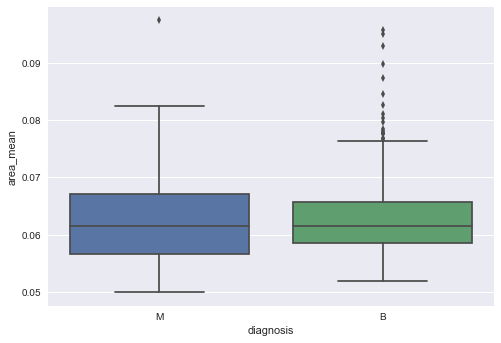

In [13]:
sns.boxplot(x='diagnosis', y='area_mean', data=breast_cancer)

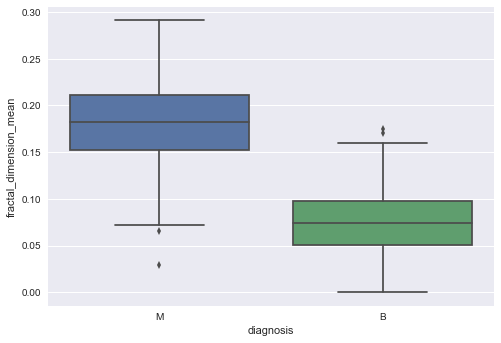

In [14]:
sns.boxplot(x='diagnosis', y='fractal_dimension_mean', data=breast_cancer)

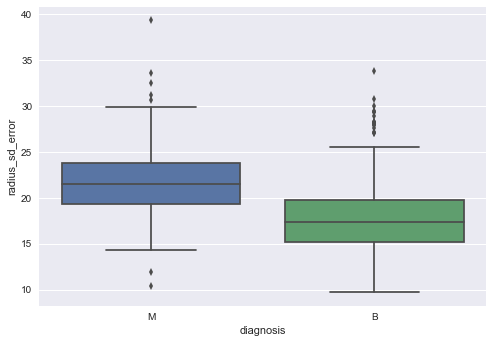

In [15]:
sns.boxplot(x='diagnosis', y='radius_sd_error', data=breast_cancer)

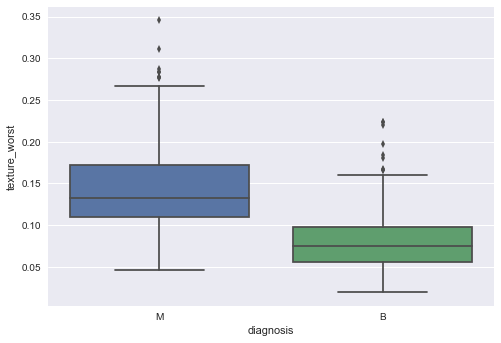

In [16]:
sns.boxplot(x='diagnosis', y='texture_worst', data=breast_cancer)

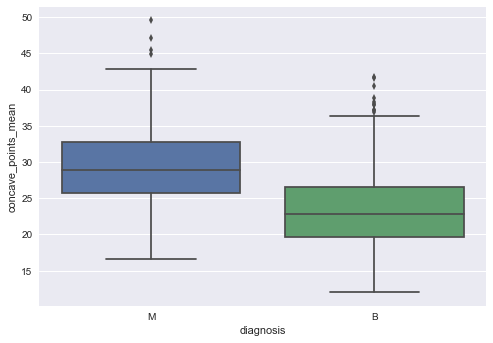

In [17]:
sns.boxplot(x='diagnosis', y='concave_points_mean', data=breast_cancer)

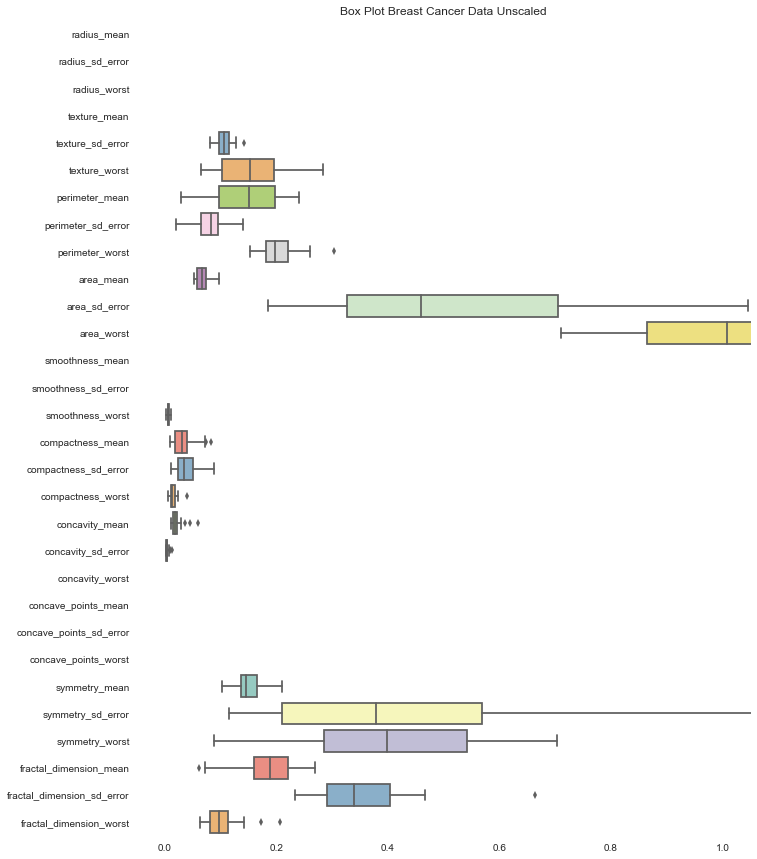

In [18]:
f, ax = plt.subplots(figsize=(11, 15))

ax.set_axis_bgcolor('#FFFFFF')
plt.title("Box Plot Breast Cancer Data Unscaled")
ax.set(xlim=(-.05, 1.05))
ax = sns.boxplot(data = breast_cancer[1:29], 
  orient = 'h', 
  palette = 'Set3')

Note: Not all analysis are sensitive scaling but many that depend on distance metrics are. As we are going apply many algorithms to the data and compare them. Let's scale the data so all analysis use the same data.

In [19]:
def scaled_df(df):
    scaled = pd.DataFrame()
    for item in df:
        if item in df.select_dtypes(include=[np.float]):
            scaled[item] = ((df[item] - df[item].min()) / 
            (df[item].max() - df[item].min()))
        else: 
            scaled[item] = df[item]
    return scaled
breast_cancer_scaled = scaled_df(breast_cancer)

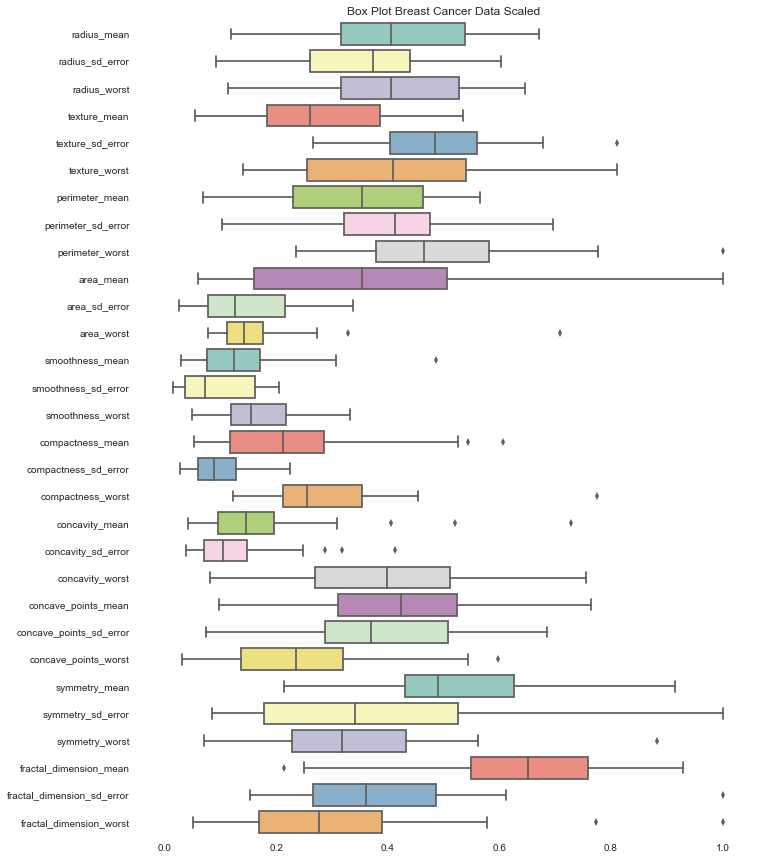

In [20]:
f, ax = plt.subplots(figsize=(11, 15))

ax.set_axis_bgcolor('#FFFFFF')
plt.title("Box Plot Breast Cancer Data Scaled")
ax.set(xlim=(-.05, 1.05))
ax = sns.boxplot(data = breast_cancer_scaled[1:29], 
  orient = 'h', 
  palette = 'Set3')

In [21]:
# Take the top predictors based on median difference
ranked_predictors=[]
for f in cat_rank[18:]:
    ranked_predictors.append(f[0])
ranked_predictors

['texture_worst',
 'symmetry_sd_error',
 'concave_points_worst',
 'radius_mean',
 'texture_mean',
 'radius_worst',
 'concavity_worst',
 'concave_points_sd_error',
 'symmetry_worst',
 'perimeter_mean',
 'perimeter_sd_error',
 'fractal_dimension_mean']

A [decision tree](https://en.wikipedia.org/wiki/Decision_tree) is a [supervised learning](https://en.wikipedia.org/wiki/Supervised_learning) algorithm that uses a tree-like graph or model of decisions and their outcomes.  The decision tree can be linearized into decision rules, where the outcome is the contents of the leaf node, and the conditions along the path form a conjunction in the if clause. In general, the rules have the form:

$if \quad condition1 \quad and \quad condition2 \quad and \quad condition3 \quad then \quad outcome$

Each node in the tree is a decisions/tests. Each path from the tree root to a leaf corresponds to a conjunction of attribute decisions/tests. The tree itself corresponds to a disjunction of these conjunctions.

Since decision trees rank the features by informatin gain we can use this to determine the most important features.



In [22]:
X = breast_cancer_scaled[predictor_names]
#setting target
y = breast_cancer_scaled["diagnosis"]

In [23]:
RFm = RandomForestClassifier(random_state = 42, 
                                criterion='gini',
                                n_estimators = 500,
                                max_features = 5)

In [24]:
RFm.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=5, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [25]:
high_info_gain = RFm.feature_importances_
index_ig = np.argsort(high_info_gain)[::-1]
index_ig

array([22, 23, 27,  7, 20,  6,  3,  2,  0, 13, 26, 10, 21, 25,  1, 24,  5,
       12, 28, 17,  4, 29, 16, 14, 19, 15, 18, 11,  8,  9])

In [26]:
# Print the feature ranking
print("Feature ranking:")
ranked_predictors_RF=[]
for f in range(len(predictor_names)):
    i = f
    if i < len(ranked_predictors):
      ranked_predictors_RF.append(predictor_names[index_ig[i]])  
    print("%d. The feature '%s' \
    has a Information Gain of %f" % (f + 1,
                predictor_names[index_ig[i]],
                high_info_gain[index_ig[f]]))

Feature ranking:
1. The feature 'concave_points_sd_error'     has a Information Gain of 0.136217
2. The feature 'concave_points_worst'     has a Information Gain of 0.127233
3. The feature 'fractal_dimension_mean'     has a Information Gain of 0.125511
4. The feature 'perimeter_sd_error'     has a Information Gain of 0.098487
5. The feature 'concavity_worst'     has a Information Gain of 0.087023
6. The feature 'perimeter_mean'     has a Information Gain of 0.051233
7. The feature 'texture_mean'     has a Information Gain of 0.047854
8. The feature 'radius_worst'     has a Information Gain of 0.047454
9. The feature 'radius_mean'     has a Information Gain of 0.044267
10. The feature 'smoothness_sd_error'     has a Information Gain of 0.035118
11. The feature 'symmetry_worst'     has a Information Gain of 0.035044
12. The feature 'area_sd_error'     has a Information Gain of 0.017245
13. The feature 'concave_points_mean'     has a Information Gain of 0.016579
14. The feature 'symmetry_

In [27]:
print ranked_predictors
print len(ranked_predictors)
print ranked_predictors_RF
print len(ranked_predictors_RF)

['texture_worst', 'symmetry_sd_error', 'concave_points_worst', 'radius_mean', 'texture_mean', 'radius_worst', 'concavity_worst', 'concave_points_sd_error', 'symmetry_worst', 'perimeter_mean', 'perimeter_sd_error', 'fractal_dimension_mean']
12
['concave_points_sd_error', 'concave_points_worst', 'fractal_dimension_mean', 'perimeter_sd_error', 'concavity_worst', 'perimeter_mean', 'texture_mean', 'radius_worst', 'radius_mean', 'smoothness_sd_error', 'symmetry_worst', 'area_sd_error']
12


In [28]:
# Lets combine the Random Forest and median difference rankings.
# Note that they are largely in agreement as only 2 were added to the original list of 12
for p in ranked_predictors_RF:
    if p not in ranked_predictors:
        ranked_predictors.append(p)
print ranked_predictors
print len(ranked_predictors)

['texture_worst', 'symmetry_sd_error', 'concave_points_worst', 'radius_mean', 'texture_mean', 'radius_worst', 'concavity_worst', 'concave_points_sd_error', 'symmetry_worst', 'perimeter_mean', 'perimeter_sd_error', 'fractal_dimension_mean', 'smoothness_sd_error', 'area_sd_error']
14


In [29]:
print ranked_predictors
i=['diagnosis']
#ranked_predictors
i=i+ranked_predictors
print i
breast_cancer_ranked=breast_cancer_scaled[i]
# convert diagnosis to a numeric variable to create a numeric dependent variable
breast_cancer_ranked['diagnosis'] = breast_cancer_ranked.diagnosis.map({'M':0, 'B':1})
breast_cancer_ranked.head()

['texture_worst', 'symmetry_sd_error', 'concave_points_worst', 'radius_mean', 'texture_mean', 'radius_worst', 'concavity_worst', 'concave_points_sd_error', 'symmetry_worst', 'perimeter_mean', 'perimeter_sd_error', 'fractal_dimension_mean', 'smoothness_sd_error', 'area_sd_error']
['diagnosis', 'texture_worst', 'symmetry_sd_error', 'concave_points_worst', 'radius_mean', 'texture_mean', 'radius_worst', 'concavity_worst', 'concave_points_sd_error', 'symmetry_worst', 'perimeter_mean', 'perimeter_sd_error', 'fractal_dimension_mean', 'smoothness_sd_error', 'area_sd_error']


,diagnosis,texture_worst,symmetry_sd_error,concave_points_worst,radius_mean,texture_mean,radius_worst,concavity_worst,concave_points_sd_error,symmetry_worst,perimeter_mean,perimeter_sd_error,fractal_dimension_mean,smoothness_sd_error,area_sd_error
0,0,0.792037,0.619292,0.450698,0.521037,0.363733,0.545989,0.620776,0.668310,0.568610,0.703140,0.731113,0.912027,0.273811,0.356147
1,0,0.181768,0.154563,0.435214,0.643144,0.501591,0.615783,0.606901,0.539818,0.192971,0.203608,0.348757,0.639175,0.125660,0.156437
2,0,0.431017,0.385375,0.374508,0.601496,0.449417,0.595743,0.556386,0.508442,0.359744,0.462512,0.635686,0.835052,0.162922,0.229622
3,0,0.811361,0.814012,0.094008,0.210090,0.102906,0.233501,0.248310,0.241347,0.548642,0.565604,0.522863,0.884880,0.038155,0.139091
4,0,0.347893,0.172415,0.341575,0.629893,0.489290,0.630986,0.519744,0.506948,0.319489,0.463918,0.518390,0.558419,0.163688,0.233822


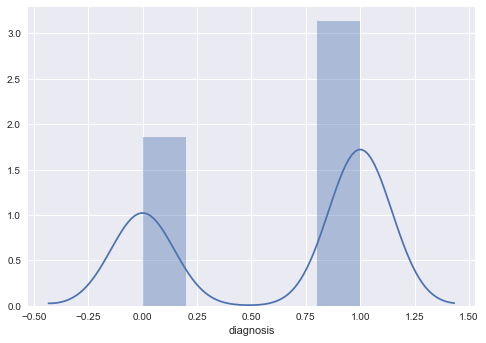

In [30]:
sns.distplot(breast_cancer_ranked['diagnosis'])

In [31]:
features_mean=list(breast_cancer_ranked.columns[1:])
# split dataframe into two based on diagnosis
breast_cancer_rankedM=breast_cancer_ranked[breast_cancer_ranked['diagnosis'] ==1]
breast_cancer_rankedB=breast_cancer_ranked[breast_cancer_ranked['diagnosis'] ==0]


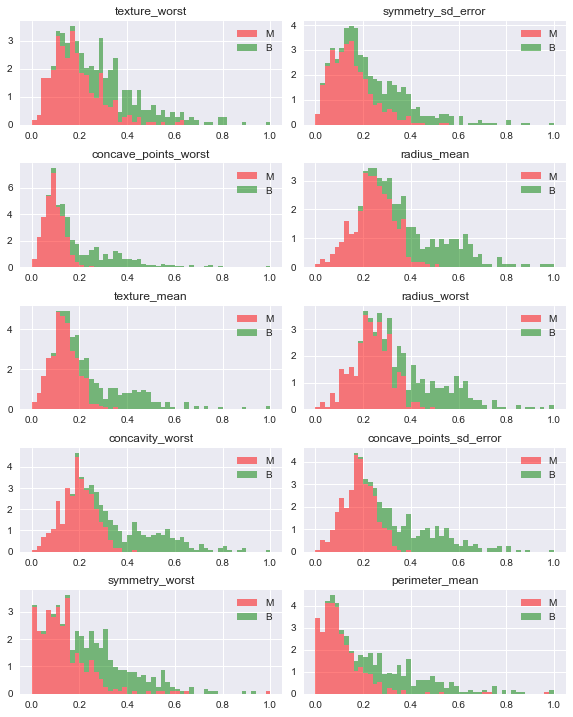

In [32]:
#Stack the data
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8,10))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(breast_cancer_ranked[features_mean[idx]]) - min(breast_cancer_ranked[features_mean[idx]]))/50
    ax.hist([breast_cancer_rankedM[features_mean[idx]],breast_cancer_rankedB[features_mean[idx]]], bins=np.arange(min(breast_cancer_ranked[features_mean[idx]]), max(breast_cancer_ranked[features_mean[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True, normed = True, label=['M','B'],color=['r','g'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()


In [33]:
breast_cancer_ranked.corr()

,diagnosis,texture_worst,symmetry_sd_error,concave_points_worst,radius_mean,texture_mean,radius_worst,concavity_worst,concave_points_sd_error,symmetry_worst,perimeter_mean,perimeter_sd_error,fractal_dimension_mean,smoothness_sd_error,area_sd_error
diagnosis,1.000000,-0.596534,-0.590998,-0.733825,-0.730029,-0.708984,-0.742636,-0.776454,-0.782914,-0.659610,-0.696360,-0.776614,-0.793566,-0.548236,-0.567134
texture_worst,-0.596534,1.000000,0.865809,0.509604,0.506124,0.498502,0.556936,0.535315,0.590210,0.816275,0.883121,0.831135,0.815573,0.455653,0.497473
symmetry_sd_error,-0.590998,0.865809,1.000000,0.438296,0.413463,0.390410,0.455774,0.475820,0.529408,0.892261,0.754968,0.667454,0.801080,0.283257,0.287103
concave_points_worst,-0.733825,0.509604,0.438296,1.000000,0.941082,0.959213,0.941550,0.984015,0.977578,0.543331,0.675987,0.809630,0.747419,0.811408,0.751548
radius_mean,-0.730029,0.506124,0.413463,0.941082,1.000000,0.987357,0.997855,0.969539,0.965137,0.526911,0.676764,0.822529,0.744214,0.735864,0.679090
texture_mean,-0.708984,0.498502,0.390410,0.959213,0.987357,1.000000,0.986507,0.962746,0.959120,0.512606,0.685983,0.823269,0.722017,0.800086,0.732562
radius_worst,-0.742636,0.556936,0.455774,0.941550,0.997855,0.986507,1.000000,0.969476,0.970387,0.563879,0.716136,0.850977,0.771241,0.744983,0.691765
concavity_worst,-0.776454,0.535315,0.475820,0.984015,0.969539,0.962746,0.969476,1.000000,0.993708,0.573975,0.688236,0.830318,0.787424,0.757373,0.715065
concave_points_sd_error,-0.782914,0.590210,0.529408,0.977578,0.965137,0.959120,0.970387,0.993708,1.000000,0.618344,0.729565,0.855923,0.816322,0.761213,0.719684
symmetry_worst,-0.659610,0.816275,0.892261,0.543331,0.526911,0.512606,0.563879,0.573975,0.618344,1.000000,0.884103,0.752399,0.855434,0.385100,0.380585


Note that the table is a little hard to read. So let's plot it.

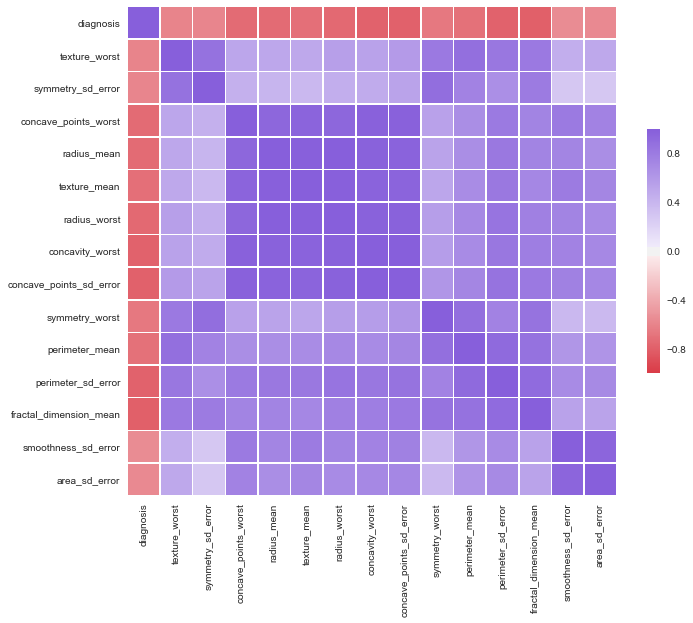

In [34]:
corr = breast_cancer_ranked.corr(method = 'pearson') # Correlation Matrix

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 275, as_cmap=True)


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,  cmap=cmap,square=True, 
            xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

diagnosis                  1.000000
texture_worst             -0.596534
symmetry_sd_error         -0.590998
concave_points_worst      -0.733825
radius_mean               -0.730029
texture_mean              -0.708984
radius_worst              -0.742636
concavity_worst           -0.776454
concave_points_sd_error   -0.782914
symmetry_worst            -0.659610
perimeter_mean            -0.696360
perimeter_sd_error        -0.776614
fractal_dimension_mean    -0.793566
smoothness_sd_error       -0.548236
area_sd_error             -0.567134
Name: diagnosis, dtype: float64

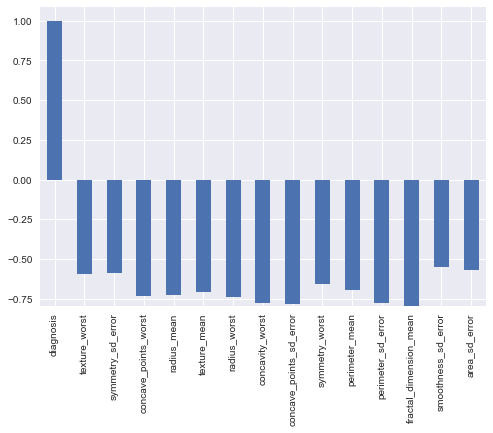

In [35]:
breast_cancer_ranked.corr()["diagnosis"].plot(kind="bar")
breast_cancer_ranked.corr()["diagnosis"]

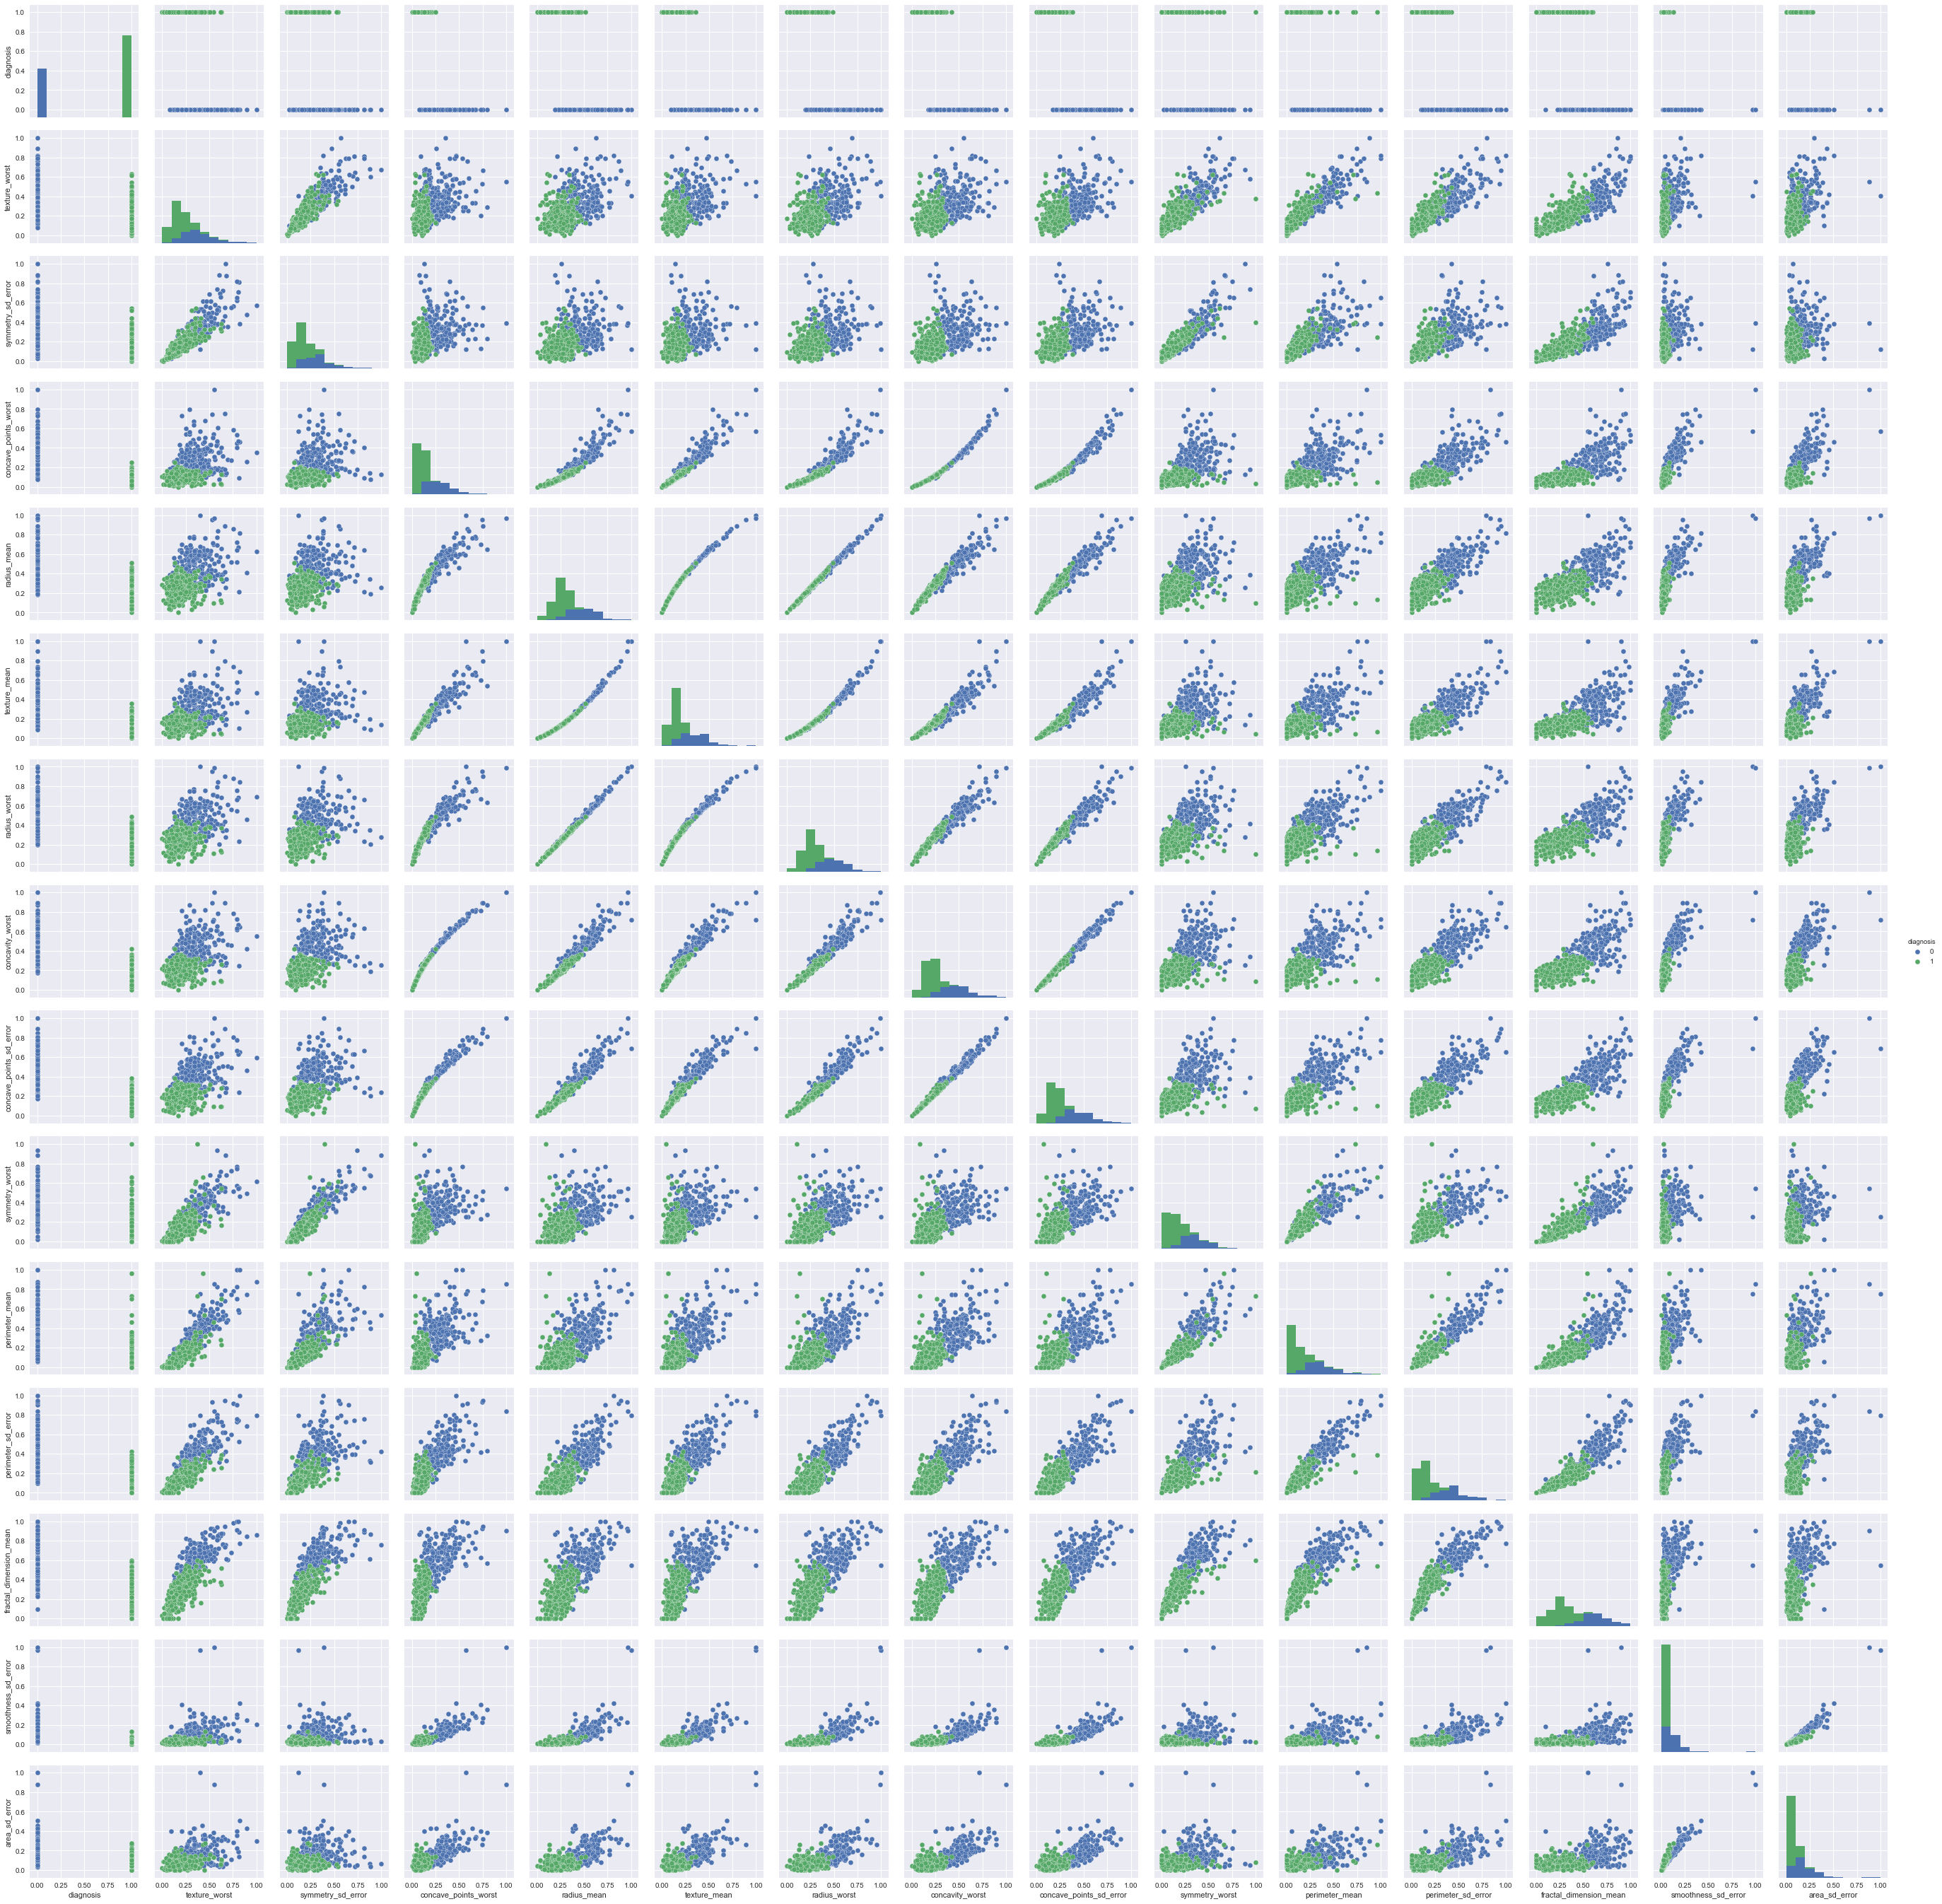

In [36]:
# Quick plot of the data using seaborn
sns.pairplot(breast_cancer_ranked, hue="diagnosis")
sns.plt.show()

Note that many of these important features are highly correlated.  We'll do our analysis with all 14 important features but this set can be reduced with the help of a domain expert.

### Let's start our analysis

In [37]:
X = breast_cancer_ranked[ranked_predictors]
#setting target
y = breast_cancer_ranked["diagnosis"]

## Naive Bayes

[Naive Bayes classifiers](https://en.wikipedia.org/wiki/Naive_Bayes_classifier) are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features.


Abstractly, naive Bayes is a conditional probability model given a problem instance to be classified, represented by a vector $\mathbf{x} = (x_1, \dots, x_n)$ representing some $n$ features (independent variables), it assigns to this instance probabilities

$$p(C_k \mid x_1, \dots, x_n)\,$$

for each of $k$ possible outcomes or classes $C_k$.

The problem with the above formulation is that if the number of features $n$ is large or if a feature can take on a large number of values, then basing such a model on probability tables is infeasible.  We therefore reformulate the model to make it more tractable.  Using Bayes' theorem, the conditional probability can be decomposed as

$$p(C_k \mid \mathbf{x}) = \frac{p(C_k) \ p(\mathbf{x} \mid C_k)}{p(\mathbf{x})} \,$$

In plain English, using Bayesian probability terminology, the above equation can be written as

$$\mbox{posterior} = \frac{\mbox{prior} \times \mbox{likelihood}}{\mbox{evidence}} \,$$

In practice, there is interest only in the numerator of that fraction, because the denominator does not depend on $C$ and the values of the features $F_i$ are given, so that the denominator is effectively constant.
The numerator is equivalent to the joint probability model

$$p(C_k, x_1, \dots, x_n)\,$$

which can be rewritten as follows, using the Chain rule for repeated applications of the definition of conditional probability

$$
\begin{align}
p(C_k, x_1, \dots, x_n) & = p(x_1, \dots, x_n, C_k) \\
                        & = p(x_1 \mid x_2, \dots, x_n, C_k) p(x_2, \dots, x_n, C_k) \\
                        & = p(x_1 \mid x_2, \dots, x_n, C_k) p(x_2 \mid x_3, \dots, x_n, C_k) p(x_3, \dots, x_n, C_k) \\
                        & = \dots \\
                        & = p(x_1 \mid x_2, \dots, x_n, C_k) p(x_2 \mid x_3, \dots, x_n, C_k) \dots   p(x_{n-1} \mid x_n, C_k) p(x_n \mid C_k) p(C_k)  \\
\end{align}
$$

Now the "naive" conditional independence assumptions come into play assume that each feature $F_i$ is conditionally statistical independence|independent of every other feature $F_j$ for $j\neq i$, given the category $C$.  This means that

$$p(x_i \mid x_{i+1}, \dots ,x_{n}, C_k ) = p(x_i \mid C_k)\,$$.

Thus, the joint model can be expressed as

$$
\begin{align}
p(C_k \mid x_1, \dots, x_n) & \varpropto p(C_k, x_1, \dots, x_n) \\
                            & \varpropto p(C_k) \ p(x_1 \mid C_k) \ p(x_2\mid C_k) \ p(x_3\mid C_k) \ \cdots \\
                            & \varpropto p(C_k) \prod_{i=1}^n p(x_i \mid C_k)\,.
\end{align}
$$

This means that under the above independence assumptions, the conditional distribution over the class variable $C$ is

$$p(C_k \mid x_1, \dots, x_n) = \frac{1}{Z} p(C_k) \prod_{i=1}^n p(x_i \mid C_k)$$

where the evidence $Z = p(\mathbf{x})$ is a scaling factor dependent only on $x_1, \dots, x_n$, that is, a constant if the values of the feature variables are known.

### Constructing a classifier from the probability model   

The discussion so far has derived the independent feature model, that is, the naive Bayes probability model.  The naive Bayes classifier combines this model with a decision rule.  One common rule is to pick the hypothesis that is most probable; this is known as the 'maximum a posteriori' or 'MAP' decision rule.  The corresponding classifier, a Bayes classifier, is the function that assigns a class label $\hat{y} = C_k$ for some $k$ as follows

$$\hat{y} = \underset{k \in \{1, \dots, K\}}{\operatorname{argmax}} \ p(C_k) \displaystyle\prod_{i=1}^n p(x_i \mid C_k).$$

In [38]:
# setting Naive Bayes classifier
nb = GaussianNB()

#dividing data to have a training and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .4, random_state=0)

# Naive Bayes cross validation
Kfold = KFold(len(breast_cancer_ranked), n_folds=5, shuffle=False)
print("KfoldCrossVal mean score using Naive Bayes is %s" %cross_val_score(nb,X,y,cv=10).mean())

# Naive Bayes metrics
NBm = nb.fit(X_train, y_train)

y_pred = NBm.predict(X_test)
print("Accuracy score using Naive Bayes is %s" %metrics.accuracy_score(y_test, y_pred))

KfoldCrossVal mean score using Naive Bayes is 0.936895039322
Accuracy score using Naive Bayes is 0.925438596491


In [39]:
# confusion matrix
print (metrics.confusion_matrix(y_test, y_pred))

[[ 74   9]
 [  8 137]]


In [40]:
# AUC
print (metrics.roc_auc_score(y_test, y_pred))

0.918196925634


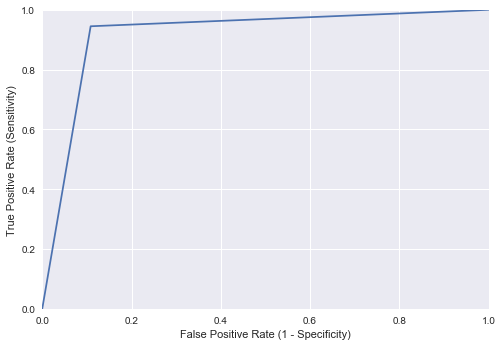

In [41]:
# plot ROC curve using y_test and y_pred
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

## Comparing Naive Bayes with other models

Advantages of Naive Bayes:

- Model training and prediction are very fast
- Somewhat interpretable
- No tuning is required
- Features don't need scaling
- Insensitive to irrelevant features (with enough observations)
- Performs better than logistic regression when the training set is very small

Disadvantages of Naive Bayes:

- Predicted probabilities are not well-calibrated
- Correlated features can be problematic (due to the independence assumption)
- Can't handle negative features (with Multinomial Naive Bayes)
- Has a higher "asymptotic error" than logistic regression




## Logistic regression

[Logistic regression](https://en.wikipedia.org/wiki/Logistic_regression), or logit regression, or is a regression model where the outcome variable is categorical. Often this is used when the variable is binary (e.g. yes/no, survived/dead, pass/fail, etc.)

Logistic regression measures the relationship between the categorical response variable and one or more predictor variables by estimating probabilities. 

**Linear regression:** continuous response is modeled as a linear combination of the features:

$$y = \beta_0 + \beta_1x$$

**Logistic regression:** log-odds of a categorical response being "true" (1) is modeled as a linear combination of the features:

$$\ln \left({p\over 1-p}\right) = \beta_0 + \beta_1x$$

This is called the **logit function**.

Probability is sometimes written as $\pi$:

$$\ln \left({\pi\over 1-\pi}\right) = \beta_0 + \beta_1x$$

The equation can be rearranged into the **logistic function**:

$$\pi = \frac{e^{\beta_0 + \beta_1x}} {1 + e^{\beta_0 + \beta_1x}}$$

- Logistic regression outputs the **probabilities of a specific class**
- Those probabilities can be converted into **class predictions**

The **logistic function** has some nice properties:

- Takes on an "s" shape
- Output is bounded by 0 and 1 (Probabilty is also bounded by 0 and 1)

### Logistic function (S-curve)

A *[logistic function](https://en.wikipedia.org/wiki/Logistic_function)* or *logistic curve* is a common "S" shape curve, with equation:

$$f(x) = \frac{1}{1 + \mathrm e^{-x}} $$ 

$$f(x) = \frac{L}{1 + \mathrm e^{-k(x-x_0)}} $$

where  

* $e$ = the natural logarithm base $e$ (also known as $e$ or Euler's number),   
* $x_0$ = the $x$-value of the sigmoid's midpoint,    
* $L$ = the curve's maximum value, and     
* $k$ = the steepness of the curve.    

For values of $x$ in the range of real number's from $-\infty$ to $\infty$, the S-curve shown on the right is obtained (with the graph of $f$ approaching $L$ as $x$ approaches $\infty$ and approaching zero as $x$ approaches $-\infty$).


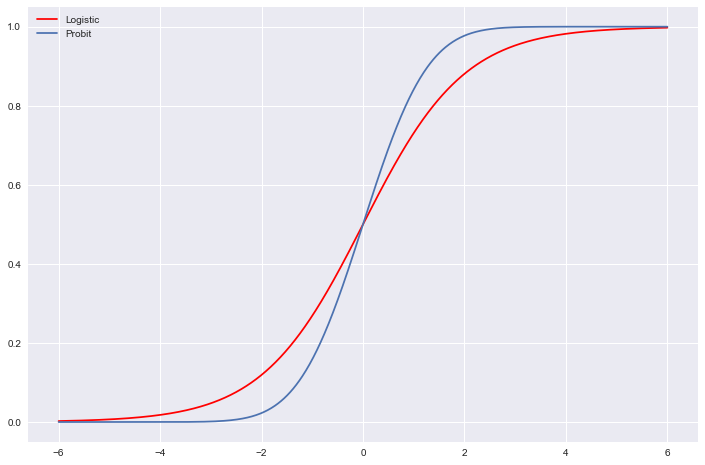

In [42]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
support = np.linspace(-6, 6, 1000)
ax.plot(support, stats.logistic.cdf(support), 'r-', label='Logistic')
ax.plot(support, stats.norm.cdf(support), label='Probit')
ax.legend();

In [43]:
# setting Logistic regression classifier

lr = LogisticRegression(C=1e9)

#dividing data to have a training and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .4, random_state=0)

# Logistic regression cross validation
Kfold = KFold(len(breast_cancer_ranked), n_folds=5, shuffle=False)
print("KfoldCrossVal mean score using Logistic regression is %s" %cross_val_score(lr,X,y,cv=10).mean())

# Logistic regression metrics
LRm = lr.fit(X_train, y_train)

y_pred = LRm.predict(X_test)
print("Accuracy score using Logistic regression is %s" %metrics.accuracy_score(y_test, y_pred))


KfoldCrossVal mean score using Logistic regression is 0.945790121856
Accuracy score using Logistic regression is 0.94298245614


In [44]:
# confusion matrix
print (metrics.confusion_matrix(y_test, y_pred))

# AUC
print (metrics.roc_auc_score(y_test, y_pred))

[[ 76   7]
 [  6 139]]
0.937141670129


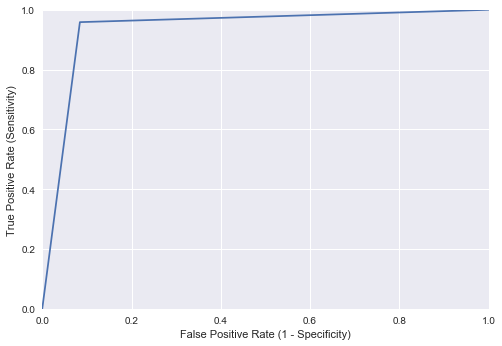

In [45]:
# plot ROC curve using y_test and y_pred
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

## Support Vector Machines


Support vector machine constructs a hyperplane or set of hyperplanes in a high- or infinite-dimensional space, which can be used for classification, regression, or other tasks. Given a set of data points that belong to either of two classes, an SVM finds the hyperplane that:

* Leaves the largest possible fraction of points of the same class on the same side.
* Maximizes the distance of either class from the hyperplane.
* Find the optimal separating hyperplane that minimizes the risk of misclassifying the training samples and unseen test samples.

![SVM](http://nikbearbrown.com/YouTube/MachineLearning/M08/SVM.png)  
*SVM*  


Pseudocode

Given a  guess of width and bias we can:

* Compute whether all data points are in the correct half-planes.  
* Compute the width of the margin.  
* Search the space of  width’s and bias to find the widest margin that matches all the datapoints.  


### Kernels

It is much easier and efficient to find Separating boundaries which are in the form of a straight lines as oppossed to curvy Separating boundaries. Kernels help us turn a linear classifier into a non-linear one. That is, they transform a curvy separating boundary that is only non-linearly separable to a linearly separable discriminant in a higher dimensional space.

![Kernels](http://nikbearbrown.com/YouTube/MachineLearning/M08/Kernels.png)

#### Kernels (1-D Example)

For example, squaring the data may take some points that are not linearly separable in 1-D space to be linearly separable in 2D space.

![Kernels](http://nikbearbrown.com/YouTube/MachineLearning/M08/Kernels_1D_2D.png)

 
### Kernel Trick 

While coming up with functions that map linearly separable sets to   SVM, we only need to know the inner product of vectors in the linearly separable sets in higher dimensional spaces arbitrarily  coordinate space.

Computing the kernel of x and y gives the same result as the dot product in the mapped (high-dimensional) space. The mappings used by SVM schemes are designed to ensure that dot products may be computed easily in terms of the variables in the original space, by defining them in terms of a kernel function k(x,y) selected to suit the problem. This "Kernel trick" is" essentially is to define a similarity function in terms of original space itself without even defining (or even knowing), what the transformation function K will be. 

### Linear SVM

Support Vectors are those datapoints that the margin pushes up against

Given some training data $\mathcal{D}$, a set of n points of the form
$\mathcal{D} = \left\{ (\mathbf{x}_i, y_i)\mid\mathbf{x}_i \in \mathbb{R}^p,\, y_i \in \{-1,1\}\right\}_{i=1}^n$
where the $y_i$ is either 1 or −1, indicating the class to which the point $\mathbf{x}_i$ belongs. Each  $\mathbf{x}_i$  is a p-dimensional real vector. We want to find the maximum-margin hyperplane that divides the points having $y_i=1$ from those having $y_i=-1$. Any hyperplane can be written as the set of points $\mathbf{x}$ satisfying $\mathbf{w}\cdot\mathbf{x} - b=0$, where $\mathbf{w}\cdot\mathbf{x}$,denotes the dot product of $\mathbf{w}$ and $\mathbf{x}$, The variable ${\mathbf{w}}$ is the (not necessarily normalized) normal vector to the hyperplane. The parameter $\tfrac{b}{\|\mathbf{w}\|}$ determines the offset of the hyperplane from the origin along the normal vector ${\mathbf{w}}$.

![Linear SVM](http://nikbearbrown.com/YouTube/MachineLearning/M08/Maximum_Margin_Classification_SVM.png)  
*Linear SVM*  


## Non-Linear SVM

Non-linear classifiers are created by applying the kernel trick then generating maximum-margin hyperplanes.


In [46]:
#setting svm classifier
svc = svm.SVC(kernel='linear', C=1).fit(X, y)

#dividing data to have a training and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .4, random_state=0)

#SVM cross validation
Kfold = KFold(len(breast_cancer_ranked), n_folds=5, shuffle=False)
print("KfoldCrossVal mean score using SVM is %s" %cross_val_score(svc,X,y,cv=10).mean())
#SVM metrics
sm = svc.fit(X_train, y_train)
y_pred = sm.predict(X_test)
print("Accuracy score using SVM is %s" %metrics.accuracy_score(y_test, y_pred))

KfoldCrossVal mean score using SVM is 0.936923126782
Accuracy score using SVM is 0.925438596491


In [47]:
# confusion matrix
print (metrics.confusion_matrix(y_test, y_pred))

# AUC
print (metrics.roc_auc_score(y_test, y_pred))

[[ 72  11]
 [  6 139]]
0.913045284587


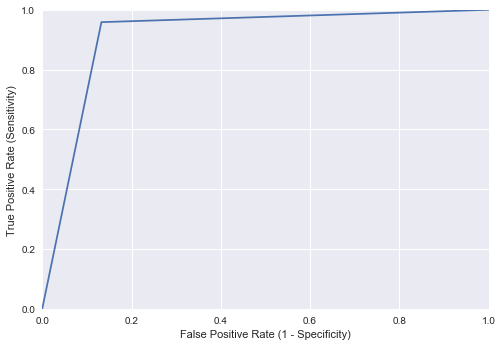

In [48]:
# plot ROC curve using y_test and y_pred
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

A [multilayer perceptron (MLP)](https://en.wikipedia.org/wiki/Multilayer_perceptron) is a feedforward artificial neural network model that maps sets of input data onto a set of appropriate outputs. An MLP consists of multiple layers of nodes in a directed graph, with each layer fully connected to the next one. Except for the input nodes, each node is a neuron (or processing element) with a nonlinear activation function. MLP utilizes a supervised learning technique called backpropagation for training the network. MLP is a modification of the standard linear perceptron and can distinguish data that is not linearly separable.

In [49]:
#  (the Multi-Layer Perceptron Classifier model) from the neural_network library of SciKit-Learn!
nn_mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(100), random_state=1).fit(X, y)
#MLP cross validation
Kfold = KFold(len(breast_cancer_ranked), n_folds=5, shuffle=False)
print("KfoldCrossVal mean score using MLP is %s" %cross_val_score(nn_mlp,X,y,cv=10).mean())
#MLP metrics
cm = nn_mlp.fit(X_train,y_train)
y_pred = cm.predict(X_test)
print("Accuracy score using MLP is %s" %metrics.accuracy_score(y_test, y_pred))


KfoldCrossVal mean score using MLP is 0.949143332469
Accuracy score using MLP is 0.929824561404


In [50]:
# confusion matrix
print (metrics.confusion_matrix(y_test, y_pred))

# AUC
print (metrics.roc_auc_score(y_test, y_pred))

[[ 77   6]
 [ 10 135]]
0.929372663066


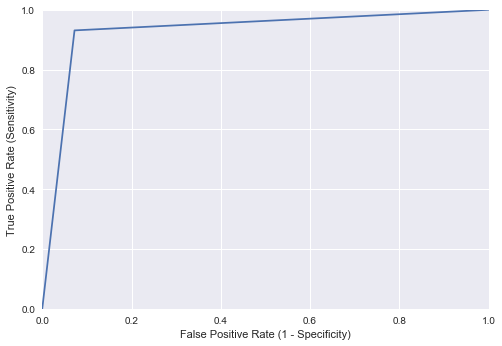

In [51]:
# plot ROC curve using y_test and y_pred
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

Note that we get different accuracy with different network structures.

In [52]:
nn_mlp_33 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(33,33,33), random_state=1).fit(X, y)
#MLP cross validation
Kfold = KFold(len(breast_cancer_ranked), n_folds=5, shuffle=False)
print("KfoldCrossVal mean score using MLP is %s" %cross_val_score(nn_mlp_33,X,y,cv=10).mean())
#MLP metrics
cm = nn_mlp_33.fit(X_train,y_train)
y_pred = cm.predict(X_test)
print("Accuracy score using MLP is %s" %metrics.accuracy_score(y_test, y_pred))

KfoldCrossVal mean score using MLP is 0.952715841327
Accuracy score using MLP is 0.951754385965


In [53]:
# confusion matrix
print (metrics.confusion_matrix(y_test, y_pred))

# AUC
print (metrics.roc_auc_score(y_test, y_pred))

[[ 77   6]
 [  5 140]]
0.946614042376


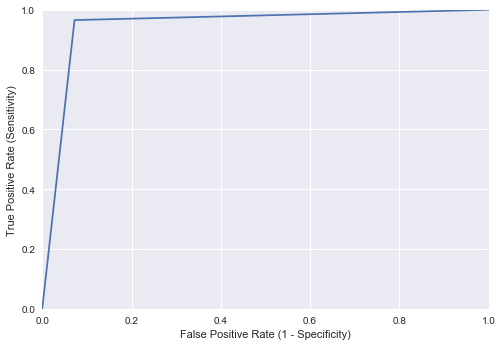

In [54]:
# plot ROC curve using y_test and y_pred
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

## k-Nearest Neighbors (kNN)

A simple supervised learning algorithm is [k-Nearest Neighbors](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) algorithm (k-NN). KNN is a non-parametric method used for classification and regression.

In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether k-NN is used for classification or regression:

In k-NN classification, the output is a class membership. An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.  

![k-nearest neighbor voting](http://nikbearbrown.com/YouTube/MachineLearning/M07/k-Nearest_Neighbors.png)  

*k-nearest neighbor voting*

In k-NN regression, the output is the property value for the object. This value is the average of the values of its k nearest neighbors.

k-NN has the nice property that a labled subset of a data set could be used to label the whole data set. This is especially important in the analysis of “big-data.” Most big-data sets are only partially labled, as labeling often librarys human annotation. While many are looking to unsupervised learning the ‘future’ of big-data, k-Nearest Neighbors is an instance of a supervised learning algorithm that can be used with big-data.


The kNN classification problem is to find the k nearest data points in a data set to a given query data point. The point is then assigned to the group by a majority "vote." For this reason, pick an odd k is prefered as the odd vote can break ties. This operation is also known as a kNN join, and can be defined as: given two data sets $R$ and $S$, find the k nearest Neighbor from $S$ for every object in $R$. $S$ refers to data that has already been classified, the training set. $R$ refers to data that is needs to be classified.

The kNN algorithm can be fairly expensive, especially if one chooses a large k, as the k-nearest neighbors in $S$ for every point in $R$ needs to be calculated.   

### Nearest neighbor search

A simple solution to finding nearest neighbors is to compute the distance from the each point in $S$ to every point in $R$ and keeping track of the "best so far". This algorithm, sometimes referred to as the naive approach, has a running time of O(|R||S|).

One can speed up the search to retrieve a "good guess" of the nearest neighbor. This is often done be limiting the search to a preset radius around a point culling out most of the points in $S$.  If k neighbors aren't not found in the radius then the bound can be iteratively expanded until k are found.  Altnernatively, the vote could be made using fewer points when k points aren't found within a radius r. 

### k-Nearest Neighbors is nonparametric "lazy learning "

K-Nearest Neighbors algorithm (kNN) is a nonparametric method for classifying objects based on the closest training examples in the feature space. kNN is nonparametric becuase it d oes not involve any estimation of parameters. This is sometimes called "lazy learning" or instance-based learning, as the mapping is approximated locally and all computation is deferred until classification. 


## kNN Classification and Distance Metrics


Neighbors are defined by a distance or dissimilarity measure. In essence, the only thing that kNN librarys is some measure of "closeness" of the points in $S$ and $R$. Any distance metric or dissimilarity measure can be used. The most common being the Euclidean distance between the points $x = (x_1, x_2,..., x_n)$ and $y = (y_1, y_2,..., y_n)$ is  given by the pythagorean formula:  

$$
\begin{align}\mathrm{d}(\mathbf{p},\mathbf{q}) = \mathrm{d}(\mathbf{q},\mathbf{p}) & = \sqrt{(q_1-p_1)^2 + (q_2-p_2)^2 + \cdots + (q_n-p_n)^2} \\[8pt]
& = \sqrt{\sum_{i=1}^n (q_i-p_i)^2}.\end{align}
$$


Any measure of "closeness",  distance or dissimilarity measure can be used. For example,

* [Chebyshev distance](https://en.wikipedia.org/wiki/Chebyshev_distance) - measures distance assuming only the most significant dimension is relevant.  
* [Hamming distance](https://en.wikipedia.org/wiki/Hamming_distance) - identifies the difference bit by bit of two strings  
* [Mahalanobis distance](https://en.wikipedia.org/wiki/Mahalanobis_distance) - normalizes based on a covariance matrix to make the distance metric scale-invariant.  
* [Manhattan distance](https://en.wikipedia.org/wiki/Taxicab_geometry) - measures distance following only axis-aligned directions.  
* [Minkowski distance](https://en.wikipedia.org/wiki/Minkowski_distance) - is a generalization that unifies Euclidean distance, Manhattan distance, and Chebyshev distance  

.. and many more.

## kNN Algorithm  


### Distance function

The distance function depends on your needs, but in general choosing features and distance metrics in which being "close" makes some sense in your domain are the distance metrics and features to choose.  The type of variable, categorical, ordinal or nominal should be considered when choosing a sensible measure of closeness.

### k nearest neighbors

Given an data point p, a training data set $S$, and an integer k, the k nearest neighbors of p from $S$, denoted as kNN(p, S), are a set of k objects from $S$ such that:


$$
∀o ∊ kNN(q, S), ∀s ∊{S – kNN(q, S)}, |o, p| ≤ |s, p|
$$




### kNN join  

Given two data sets R and S (where S is a training data set) and an integer k, the kNN join of R and S is defined as:

kNNjoin(R, S) = {(r, s)|∀r ∊ R, ∀s ∊ kNN(r, S)}

Basically, this combines each object r ∊ R with its k nearest neighbors from S.


## Steps in kNN Classification  


The kNN algorithm can be summarized in the following simple steps:

* Determine k (the selection of k depends on your data and project libraryments; there is no magic formula for k).  

* Calculate the distances between the new input and all the training data (as with k, the selection of a distance function also depends on the type of data).  

* Sort the distance and determine the k nearest neighbors based on the kth minimum distance.  

* Gather the categories of those neighbors.  

* Determine the category based on majority vote

In [55]:
knn_k = []
for i in range(0,33):  # try up to k=33
    if (i % 2 != 0): # Use only odd k 
        knn_k.append(i)

cross_vals = []
for k in knn_k:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,
                             X_train, 
                             y_train, 
                             cv = 10, 
                             scoring='accuracy')
    cross_vals.append(scores.mean())

MSE = [1 - x for x in cross_vals]
optimal_k = knn_k[MSE.index(min(MSE))]
print("Optimal K is {0}".format(optimal_k))

Optimal K is 23


In [56]:
# setting kNN classifier
knn = KNeighborsClassifier(n_neighbors=23)

#dividing data to have a training and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .4, random_state=0)

# kNN cross validation
Kfold = KFold(len(breast_cancer_ranked), n_folds=5, shuffle=False)
print("KfoldCrossVal mean score using kNN is %s" %cross_val_score(knn,X,y,cv=10).mean())

# kNN metrics
kNNm = knn.fit(X_train, y_train)

y_pred = kNNm.predict(X_test)
print("Accuracy score using kNN is %s" %metrics.accuracy_score(y_test, y_pred))


KfoldCrossVal mean score using kNN is 0.94046430732
Accuracy score using kNN is 0.907894736842


In [57]:
# confusion matrix
print (metrics.confusion_matrix(y_test, y_pred))

# AUC
print (metrics.roc_auc_score(y_test, y_pred))

[[ 69  14]
 [  7 138]]
0.891524719568


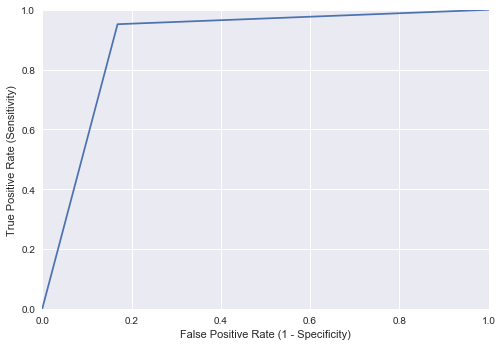

In [58]:
# plot ROC curve using y_test and y_pred
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

In [59]:
#Generic function for making a classification model and accessing the performance. 
# From AnalyticsVidhya tutorial
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0], n_folds=5)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
    
    print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    
  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 

## Decision Tree Model


A [decision tree](https://en.wikipedia.org/wiki/Decision_tree) is a decision support tool that uses a tree-like graph or model of decisions and their outcomes.  The decision tree can be linearized into decision rules, where the outcome is the contents of the leaf node, and the conditions along the path form a conjunction in the if clause. In general, the rules have the form:

$if \quad condition1 \quad and \quad condition2 \quad and \quad condition3 \quad then \quad outcome$

Each node in the tree is a decisions/tests. Each path from the tree root to a leaf corresponds to a conjunction of attribute decisions/tests. The tree itself corresponds to a disjunction of these conjunctions.



### Growing a Decision Tree

Top-down: Which attribute shoud ne the root?

We construct a tree from the top down starting with the question:  which attribute should be tested at the root of the tree? That is, which attribute best splits/sperates the labled training data.

Then build subtrees recursively, asking the same question on the remaining attributes.


### Information gain

Heuristic: choose the attribute that produces the “purest” nodes. That is, the most homogeneous splits. A popular impurity criterion is information gain. Information gain increases with the average purity of the subsets. The idea is to choose the attribute that gives greatest information gain as the root of the tree.


### Entropy

The notion of using entropy as a measure of change in system state and dynamics comes both from [statistical physics](https://en.wikipedia.org/wiki/Entropy) and from [information theory](https://en.wikipedia.org/wiki/Entropy_(information_theory)). In statistical physics, entropy is a measure of disorder and uncertainty in a random variable; the higher the entropy, the greater the disorder. [(Gray,1990), (Behara et al., 1973), (Yeung,2002) ] In the statistical physics context, the term usually refers to [Gibbs entropy](https://en.wikipedia.org/wiki/Entropy_(statistical_thermodynamics)#Gibbs_Entropy_Formula), which measures the macroscopic state of the system as defined by a distribution of atoms and molecules in a thermodynamic system. Gibbs entropy is a measure of the disorder in the arrangements of its particles. As the position of a particle becomes less predictable, the entropy increases. For a classical system (i.e., a collection of classical particles) with a discrete set of microstates, if $E_i$ is the energy of microstate $i$, and $p_i$ is the probability that it occurs during the system's fluctuations, then the entropy of the system is

$$
S = -k_\text{B}\,\sum_i p_i \ln \,p_i
$$

The quantity $k_\text{B}$ is a physical constant known as [Boltzmann's constant](https://en.wikipedia.org/wiki/Boltzmann_constant), which, like the entropy, has units of heat capacity. The logarithm is dimensionless.

In information theory, entropy is also a measure of the uncertainty in a random variable. [(Cover & Thomas, 1991),(Emmert-Streib & Dehmer, 2009)] In this context, however, the term usually refers to the [Shannon entropy](https://en.wikipedia.org/wiki/Entropy_(information_theory)), which quantifies the expected value of the information contained in a message (or the expected value of the information of the probability distribution). The concept was introduced by [Claude E. Shannon](https://en.wikipedia.org/wiki/Claude_Shannon) in his 1948 paper "A Mathematical Theory of Communication." [(Shannon, 1948)] Shannon entropy establishes the limits to possible data compression and channel capacity.  That is, the entropy gives a lower bound for the efficiency of an encoding scheme (in other words, a lower bound on the possible compression of a data stream). Typically this is expressed in the number of ‘bits’ or ‘nats’ that are required to encode a given message. Given the probability of each of n events, the information required to predict an event is the distribution’s entropy. Low entropy means the system is very ordered, that is, very predictable. High entropy means the system is mixed, that is, very un predictable; a lot of information is needed for prediction. 


The Shannon entropy can explicitly be written as

$$
E(X) = \sum_{i} {\mathrm{P}(x_i)\,\mathrm{I}(x_i)} = -\sum_{i} {\mathrm{P}(x_i) \log_b \mathrm{P}(x_i)},
$$

where b is the base of the logarithm used. Common values of b are 2, Euler's number e, and 10, and the unit of entropy is shannon for b = 2, nat for b = e, and hartley for b = 10.When b = 2, the units of entropy are also commonly referred to as bits.


The Shannon entropy is by far the most common information-theoretic measure there are others. Other information-theoretic measures include: plog,Rényi entropy, Hartley entropy, collision entropy, min-entropy, Kullback-Leibler divergence and the information dimension.


## ID3 algorithm

This idea of iteratively finding the attribute with the most information gain to find a root in decision tree learning is called the  [ID3 (Iterative Dichotomiser 3)](https://en.wikipedia.org/wiki/ID3_algorithm) algorithm. The invented by [Ross Quinlan](https://en.wikipedia.org/wiki/Ross_Quinlan). It is a simple algorithm once one understands the concept of entropy and information gain.  

1.  Calculate the entropy of every attribute using the data set S, using the Shannon entropy.
2. Split the set S into subsets using the attribute for which entropy is minimum (or, equivalently, information gain is maximum)  
3. Make the decision tree (or sub-tree) root node that attribute.  
4. Recur on subsets using remaining attributes.  


### C4.5 algorithm

[C4.5](https://en.wikipedia.org/wiki/C4.5_algorithm) is an extension of Quinlan's earlier ID3 algorithm. The splitting criterion is based on statistical confidence estimates. This technique has the advantage that it allows all of the available labeled data to be used for training. To generate this confidence one calculates the error rate over $n$ labled training instances. The observed error rate $e$ is analaogous to the observed fraction of heads in $n$  tosses of a biased coin (i.e. the probability of heads may not be 0.5). One wishes to estimate the true error rate, $p$ from the observed error rate $e$.   

The confidence interval, is calculated as follows, if one chooses a level of confidence $z$ then 

$$
p = e + z \times \sqrt{e \times \frac{1-e}{n}}
$$  

Paired values for z and confidence levels (z,confidence) are in the following lists: (0.67 z, 50% confidence), (1.0 z, 68% confidence) , (1.64 z, 90% confidence) and (1.96 z, 95% confidence).


In [60]:
# Decision Tree classifier

DTm = DecisionTreeClassifier()
                                
#dividing data to have a training and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .4, random_state=0)

# Decision Tree cross validation

Kfold = KFold(len(breast_cancer_ranked), n_folds=5, shuffle=False)

print("KfoldCrossVal mean score using Decision Tree is %s" %cross_val_score(DTm,X,y,cv=10).mean())

# Decision Tree metrics
sm = DTm.fit(X_train, y_train)

y_pred = sm.predict(X_test)
print("Accuracy score using Decision Tree is %s" %metrics.accuracy_score(y_test, y_pred))

KfoldCrossVal mean score using Decision Tree is 0.915929910984
Accuracy score using Decision Tree is 0.916666666667


In [61]:
# confusion matrix
print (metrics.confusion_matrix(y_test, y_pred))

# AUC
print (metrics.roc_auc_score(y_test, y_pred))

[[ 74   9]
 [ 10 135]]
0.911300373909


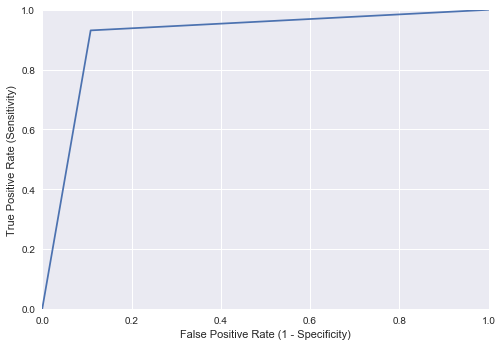

In [62]:
# plot ROC curve using y_test and y_pred
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

## Random Forest Model

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision trees' habit of overfitting to their training set.

In [63]:
# Random Forest classifier

RFm = RandomForestClassifier(random_state = 42, 
                                criterion='gini',
                                n_estimators = 500,
                                max_features = 5)
                                
#dividing data to have a training and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .4, random_state=0)

# Random Forest cross validation

Kfold = KFold(len(breast_cancer_ranked), n_folds=5, shuffle=False)

print("KfoldCrossVal mean score using Random Forest is %s" %cross_val_score(RFm,X,y,cv=10).mean())

# Random Forest metrics
sm = RFm.fit(X_train, y_train)

y_pred = sm.predict(X_test)
print("Accuracy score using Random Forest is %s" %metrics.accuracy_score(y_test, y_pred))

KfoldCrossVal mean score using Random Forest is 0.936986863711
Accuracy score using Random Forest is 0.938596491228


In [64]:
# confusion matrix
print (metrics.confusion_matrix(y_test, y_pred))

# AUC
print (metrics.roc_auc_score(y_test, y_pred))

[[ 73  10]
 [  4 141]]
0.925965932696


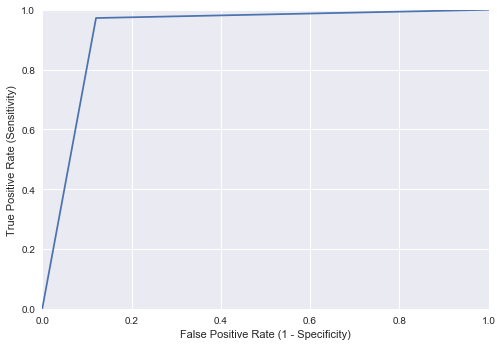

In [65]:
# plot ROC curve using y_test and y_pred
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')